<a href="https://colab.research.google.com/github/niths1271/MACHINE-LEARNING-LAB/blob/main/LAB%206/K_MeansClustering(using_libraries).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df = pd.read_csv('/content/drive/MyDrive/income.csv')
df.head(10)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [9]:
scaler = MinMaxScaler()
scaler.fit(df[['Age']])
df[['Age']] = scaler.transform(df[['Age']])

scaler.fit(df[['Income($)']])
df[['Income($)']] = scaler.transform(df[['Income($)']])
df.head(10)

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436
5,Gautam,0.764706,0.940171
6,David,0.882353,0.982906
7,Andrea,0.705882,1.000000
8,Brad,0.588235,0.948718
9,Angelina,0.529412,0.726496


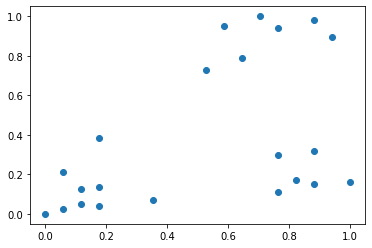

In [10]:
plt.scatter(df['Age'], df['Income($)'])

### Finding Elbow Point

In [11]:
k_range = range(1, 11)
sse = []
for k in k_range:
    kmc = KMeans(n_clusters=k)
    kmc.fit(df[['Age', 'Income($)']])
    sse.append(kmc.inertia_)
sse

[5.434011511988178,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419566,
 0.27768187154369994,
 0.22020960864009398,
 0.1735559655531264,
 0.1327661931978319,
 0.10188787724979426,
 0.08026197041664467]

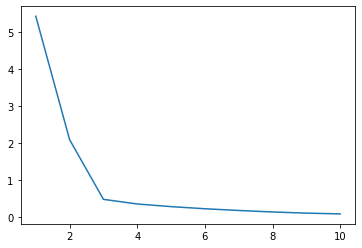

In [12]:
plt.xlabel = 'Number of Clusters'
plt.ylabel = 'Sum of Squared Errors'
plt.plot(k_range, sse)

#### Therefore, the elbow point is 3

In [13]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [14]:
y_predict = km.fit_predict(df[['Age', 'Income($)']])
y_predict

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [15]:
df['cluster'] = y_predict
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [16]:
df0 = df[df.cluster == 0]
df0

,Name,Age,Income($),cluster
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0
10,Donald,0.647059,0.786325,0


In [17]:
df1 = df[df.cluster == 1]
df1

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
11,Tom,0.000000,0.000000,1
12,Arnold,0.058824,0.025641,1
13,Jared,0.117647,0.051282,1
14,Stark,0.176471,0.038462,1
15,Ranbir,0.352941,0.068376,1


In [18]:
df2 = df[df.cluster == 2]
df2

,Name,Age,Income($),cluster
16,Dipika,0.823529,0.170940,2
17,Priyanka,0.882353,0.153846,2
18,Nick,1.000000,0.162393,2
19,Alia,0.764706,0.299145,2
20,Sid,0.882353,0.316239,2
21,Abdul,0.764706,0.111111,2


In [19]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

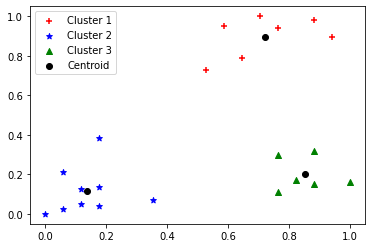

In [22]:
p1 = plt.scatter(df0['Age'], df0['Income($)'], marker='+', color='red')
p2 = plt.scatter(df1['Age'], df1['Income($)'], marker='*', color='blue')
p3 = plt.scatter(df2['Age'], df2['Income($)'], marker='^', color='green')
c = plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black')
plt.legend((p1, p2, p3, c),
          ('Cluster 1', 'Cluster 2', 'Cluster 3', 'Centroid'))